21 - Scratch assay analysis with just 5 lines code in Python
1.   img seg
2.   for loop
3.   make fig

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
path = r'/content/gdrive/My Drive/Colab Notebooks/screeni_practice'
os.chdir( path )

Mounted at /content/gdrive


In [ ]:
from skimage.filters.rank import entropy
from skimage.morphology import disk

from skimage import io
import matplotlib.pyplot as plt
import numpy as np

from skimage.filters import threshold_otsu
import glob

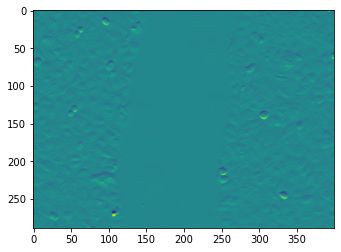

In [ ]:
img = io.imread('images/scratch.jpg')
plt.imshow(img)

34056


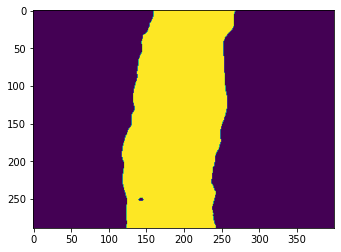

In [ ]:
entropy_img = entropy(img, disk(12))
thresh = threshold_otsu(entropy_img)
# print(thresh)
# plt.imshow(entropy_img)
binary = entropy_img <= thresh
plt.imshow(binary)
print(np.sum(binary == 1))

images/scratch_assay/Scratch0.jpg 0 34056
images/scratch_assay/Scratch1.jpg 1 28218
images/scratch_assay/Scratch2.jpg 2 23536
images/scratch_assay/Scratch3.jpg 3 20489
images/scratch_assay/Scratch4.jpg 4 18111
images/scratch_assay/Scratch5.jpg 5 15622
images/scratch_assay/Scratch6.jpg 6 14102
images/scratch_assay/Scratch7.jpg 7 12502
images/scratch_assay/Scratch8.jpg 8 10949
images/scratch_assay/Scratch9.jpg 9 8860
y =  -2572.527272727273 x + 30220.87272727273
R² =  0.9425785706337135


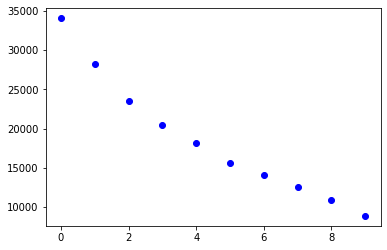

In [ ]:
time = 0
time_list = []
area_list = []
path = 'images/scratch_assay/*.*'

for file in sorted(glob.glob(path)):


  img = io.imread(file)
  entropy_img = entropy(img, disk(12))
  thresh = threshold_otsu(entropy_img)
  binary = entropy_img <= thresh
  scratch_area = np.sum(binary == True)
  print(file, time, scratch_area)
  time_list.append(time)
  area_list.append(scratch_area)
  time += 1

# print(time_list, area_list)
plt.plot(time_list, area_list, 'bo')

from scipy.stats import linregress
slope, intercept, rvalue, pvalue, stderr = linregress(time_list, area_list)
print('y = ', slope, 'x', '+', intercept)
print('R\N{SUPERSCRIPT TWO} = ', rvalue**2)